##### An example of using foresee from jupyter notebook

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys
import pandas as pd
import numpy as np

In [3]:
# import local modules

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+'\\scripts')

import main
import utils

In [4]:
# sample time-series dataframe with only one column

ts_df = utils.read_csv('basic_time_series_data.csv')
ts_df.head(2)

,Close
0,75.779999
1,75.610001


In [5]:
# user defind parameters

# time series values column name: required if input dataframe has more than one column

endog_colname = None

if len(ts_df.columns) > 1 and endog_colname is None:
    raise ValueError('time series column name is required!!!')

freq = 5
fcst_length = 10
# model_list = ['ewm_model']
model_list = ['ewm_model', 'fft', 'holt_winters', 'prophet', 'sarimax']

'''
avilable run types: 'best_model', 'all_best', 'all_models'
'''

run_type = 'all_models'

# if comparing models (run_type is 'best_model' or 'all_best') then holdout length is required

if run_type == 'all_models':
    holdout_length = None
else:
    holdout_length = 20


# we are working with one time series and no date-time column so time series id and date-time column name are set to None.
gbkey = None
ds_column = None

In [6]:
'''
result:  dataframe containing fitted values and future forecasts
fit_results_list:  list of dictionaries containing fitted values, forecasts, and errors (useful for debuging)
'''

result, fit_result_list = main.collect_result(
                                                    ts_df.copy(),
                                                    endog_colname,
                                                    gbkey,
                                                    ds_column, 
                                                    freq, 
                                                    fcst_length, 
                                                    run_type, 
                                                    holdout_length, 
                                                    model_list
                                            )

result.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,y,data_split,ewm_model_forecast,ewm_model_wfa,fft_forecast,fft_wfa,holt_winters_forecast,holt_winters_wfa,prophet_forecast,prophet_wfa,sarimax_forecast,sarimax_wfa,ts_id
0,75.779999,Train,75.779999,None,73.346118,None,75.294657,None,75.164220,None,0.000000,None,1
1,75.610001,Train,75.678000,None,73.845848,None,75.952938,None,75.011089,None,75.853524,None,1
2,76.800003,Train,76.209475,None,74.200030,None,76.396626,None,74.502330,None,75.683361,None,1
3,75.750000,Train,76.018616,None,74.371330,None,76.382634,None,73.703786,None,76.874518,None,1
4,73.839996,Train,75.182274,None,74.340268,None,75.113715,None,73.707187,None,75.823496,None,1


In [7]:
result.tail(10)

,y,data_split,ewm_model_forecast,ewm_model_wfa,fft_forecast,fft_wfa,holt_winters_forecast,holt_winters_wfa,prophet_forecast,prophet_wfa,sarimax_forecast,sarimax_wfa,ts_id
128,0.0,Forecast,85.163501,None,87.830678,None,85.548936,None,86.480362,None,85.392770,None,1
129,0.0,Forecast,85.163501,None,88.330409,None,85.220065,None,86.336245,None,85.475622,None,1
130,0.0,Forecast,85.163501,None,88.684590,None,85.070410,None,86.994074,None,85.558554,None,1
131,0.0,Forecast,85.163501,None,88.855890,None,84.771880,None,87.348939,None,85.641568,None,1
132,0.0,Forecast,85.163501,None,88.824828,None,85.325071,None,87.645706,None,85.724661,None,1
133,0.0,Forecast,85.163501,None,88.592441,None,85.548936,None,87.713753,None,85.807835,None,1
134,0.0,Forecast,85.163501,None,88.180183,None,85.220065,None,88.215050,None,85.891090,None,1
135,0.0,Forecast,85.163501,None,87.627075,None,85.070410,None,88.360718,None,85.974426,None,1
136,0.0,Forecast,85.163501,None,86.984529,None,84.771880,None,88.216601,None,86.057843,None,1
137,0.0,Forecast,85.163501,None,86.309595,None,85.325071,None,88.874430,None,86.141340,None,1


In [8]:
ts_df.head()

,Close
0,75.779999
1,75.610001
2,76.800003
3,75.750000
4,73.839996


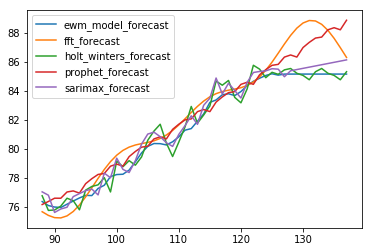

In [9]:
# m_list = model_list.remove('prophet')
for k, df in result.groupby('ts_id'):
    df.iloc[-50:].plot(y=[x+'_forecast' for x in model_list])


In [10]:
for item in fit_result_list:
    for model in model_list:
        if item[model+'_err'] is not None:
            print(model + ': ' + item[model+'_err'])

In [11]:
fit_result_list[0]

{'ts_id': 1,
 'ewm_model_fit_fcst_df':              y data_split  ewm_model_forecast ewm_model_wfa  fft_forecast  \
 0    75.779999      Train           75.779999          None     73.346118   
 1    75.610001      Train           75.678000          None     73.845848   
 2    76.800003      Train           76.209475          None     74.200030   
 3    75.750000      Train           76.018616          None     74.371330   
 4    73.839996      Train           75.182274          None     74.340268   
 ..         ...        ...                 ...           ...           ...   
 133   0.000000   Forecast           85.163501          None     88.592441   
 134   0.000000   Forecast           85.163501          None     88.180183   
 135   0.000000   Forecast           85.163501          None     87.627075   
 136   0.000000   Forecast           85.163501          None     86.984529   
 137   0.000000   Forecast           85.163501          None     86.309595   
 
     fft_wfa  holt_winte